# Notebook 4: Neural Network Layers

## From Single Neurons to Powerful Teams

Welcome back! In our previous notebooks, we learned about:
- What a neural network is (Notebook 1)
- How a single neuron works (Notebook 2)
- Different activation functions (Notebook 3)

Now it's time to scale up! 🚀

### 💡 Key Question: Why Do We Need Multiple Neurons?

Think about it this way:
- **One neuron** is like one person trying to solve a complex problem
- **Multiple neurons (a layer)** is like a team of experts, each focusing on different aspects

### 🏭 The Assembly Line Analogy

Imagine a car manufacturing plant:
- **Single neuron**: One person building an entire car (slow, limited)
- **Layer of neurons**: An assembly line where multiple workers process the car simultaneously
  - Worker 1: Checks the engine
  - Worker 2: Inspects the wheels  
  - Worker 3: Tests the electronics
  - Worker 4: Examines the body

Each neuron in a layer looks at the same input data but learns to detect **different features**!

Let's build this step by step! 🔧

In [22]:
# Import our tools - these are libraries that help us work with numbers and create visualizations
import numpy as np  # NumPy: for mathematical operations and arrays
import matplotlib.pyplot as plt  # Matplotlib: for creating graphs and visualizations

# This makes our plots appear directly in the notebook
%matplotlib inline

# Set random seed so we get the same random numbers every time (makes our experiments reproducible)
np.random.seed(42)  # 42 is just a popular choice (from "Hitchhiker's Guide to the Galaxy")

print("✅ Libraries imported successfully!")
print("📦 NumPy version:", np.__version__)  # Show which version of NumPy we're using

✅ Libraries imported successfully!
📦 NumPy version: 1.26.4


## Part 1: From One Neuron to Many

### 🧠 Recap: Single Neuron

Remember, a single neuron does this:
1. Takes inputs: `x1, x2, x3, ...`
2. Multiplies each by a weight: `w1*x1, w2*x2, w3*x3, ...`
3. Adds them up: `sum = w1*x1 + w2*x2 + w3*x3 + ...`
4. Adds a bias: `sum + bias`
5. Applies activation function: `activation(sum + bias)`

Let's code a single neuron as a refresher:

In [23]:
# Define a simple ReLU activation function (from Notebook 3)
def relu(x):
    """
    ReLU activation function: Returns max(0, x)
    - If x is positive, return x
    - If x is negative or zero, return 0
    """
    return np.maximum(0, x)  # Element-wise maximum between 0 and x

# Single neuron function
def single_neuron(inputs, weights, bias):
    """
    Compute the output of a single neuron.
    
    Parameters:
    - inputs: array of input values [x1, x2, x3, ...]
    - weights: array of weights [w1, w2, w3, ...]
    - bias: single number (the bias term)
    
    Returns:
    - output: the neuron's output after activation
    """
    # Step 1: Calculate weighted sum (multiply inputs by weights and sum)
    weighted_sum = np.dot(inputs, weights)  # Same as: inputs[0]*weights[0] + inputs[1]*weights[1] + ...
    
    # Step 2: Add the bias
    z = weighted_sum + bias
    
    # Step 3: Apply activation function (ReLU)
    output = relu(z)
    
    return output

# Example: Let's test our single neuron
example_inputs = np.array([1.0, 2.0, 3.0])  # Three input values
example_weights = np.array([0.5, -0.3, 0.8])  # Three weights (one for each input)
example_bias = 0.1  # One bias value

# Run the neuron
neuron_output = single_neuron(example_inputs, example_weights, example_bias)

print("🔢 Input values:", example_inputs)
print("⚖️  Weights:", example_weights)
print("➕ Bias:", example_bias)
print("\n📊 Calculation:")
print(f"   Weighted sum: {example_inputs[0]}*{example_weights[0]} + {example_inputs[1]}*{example_weights[1]} + {example_inputs[2]}*{example_weights[2]} = {np.dot(example_inputs, example_weights):.2f}")
print(f"   Add bias: {np.dot(example_inputs, example_weights):.2f} + {example_bias} = {np.dot(example_inputs, example_weights) + example_bias:.2f}")
print(f"   Apply ReLU: max(0, {np.dot(example_inputs, example_weights) + example_bias:.2f}) = {neuron_output:.2f}")
print(f"\n✨ Final output: {neuron_output:.2f}")

🔢 Input values: [1. 2. 3.]
⚖️  Weights: [ 0.5 -0.3  0.8]
➕ Bias: 0.1

📊 Calculation:
   Weighted sum: 1.0*0.5 + 2.0*-0.3 + 3.0*0.8 = 2.30
   Add bias: 2.30 + 0.1 = 2.40
   Apply ReLU: max(0, 2.40) = 2.40

✨ Final output: 2.40


## Part 2: Creating a Layer of Neurons

### 👥 The Committee Analogy

Now imagine we have **4 neurons** all looking at the **same 3 inputs**:
- **Neuron 1**: Might learn to detect "vertical edges"
- **Neuron 2**: Might learn to detect "horizontal edges"
- **Neuron 3**: Might learn to detect "curves"
- **Neuron 4**: Might learn to detect "brightness"

Each neuron has its **own weights and bias** - they're all specialists!

### 📊 Layer Structure

If we have:
- **3 inputs** (x1, x2, x3)
- **4 neurons** in our layer

Then we need:
- **12 weights** (3 weights per neuron × 4 neurons)
- **4 biases** (1 bias per neuron)

Let's implement this the **simple way first** (with a loop):

In [24]:
# Method 1: Using a loop (easy to understand, but slower)
def layer_with_loop(inputs, weights, biases):
    """
    Compute the output of a layer using a loop.
    
    Parameters:
    - inputs: array of shape (num_inputs,) - e.g., [x1, x2, x3]
    - weights: 2D array of shape (num_inputs, num_neurons) - weights for all neurons
    - biases: array of shape (num_neurons,) - one bias per neuron
    
    Returns:
    - outputs: array of shape (num_neurons,) - outputs from all neurons
    """
    # Get the number of neurons in this layer
    num_neurons = weights.shape[1]  # weights.shape[1] tells us how many columns (neurons) we have
    
    # Create an empty list to store outputs from each neuron
    outputs = []  # We'll append each neuron's output to this list
    
    # Loop through each neuron
    for i in range(num_neurons):  # i goes from 0 to num_neurons-1
        # Get the weights for this specific neuron (column i from weights matrix)
        neuron_weights = weights[:, i]  # The : means "all rows", i means "column i"
        
        # Get the bias for this specific neuron
        neuron_bias = biases[i]  # Get the i-th bias value
        
        # Calculate this neuron's output using our single_neuron function
        neuron_output = single_neuron(inputs, neuron_weights, neuron_bias)
        
        # Add this neuron's output to our list
        outputs.append(neuron_output)
        
        # Print what this neuron is doing (for learning purposes)
        print(f"Neuron {i+1}: weights={neuron_weights}, bias={neuron_bias:.2f} → output={neuron_output:.2f}")
    
    # Convert the list to a NumPy array and return
    return np.array(outputs)

# Create example data for a layer
layer_inputs = np.array([1.0, 2.0, 3.0])  # 3 input values

# Create weights for 4 neurons (each neuron needs 3 weights for 3 inputs)
# Shape: (3 inputs, 4 neurons)
layer_weights = np.array([
    [0.2, -0.3, 0.5, 0.1],  # Weights from input 1 to each of the 4 neurons
    [0.8, 0.4, -0.2, 0.6],  # Weights from input 2 to each of the 4 neurons
    [-0.5, 0.7, 0.3, -0.1]  # Weights from input 3 to each of the 4 neurons
])

# Create biases (one per neuron)
layer_biases = np.array([0.1, -0.2, 0.3, 0.15])  # 4 biases for 4 neurons

print("🔄 Computing layer output using a loop:\n")
print("📥 Inputs:", layer_inputs)
print("⚖️  Weights shape:", layer_weights.shape, "(3 inputs × 4 neurons)")
print("➕ Biases:", layer_biases)
print("\n" + "="*60)

# Compute the layer output
layer_outputs_loop = layer_with_loop(layer_inputs, layer_weights, layer_biases)

print("="*60)
print("\n✨ Final layer outputs:", layer_outputs_loop)
print("📊 We went from 3 inputs → 4 outputs (one from each neuron)!")

🔄 Computing layer output using a loop:

📥 Inputs: [1. 2. 3.]
⚖️  Weights shape: (3, 4) (3 inputs × 4 neurons)
➕ Biases: [ 0.1  -0.2   0.3   0.15]

Neuron 1: weights=[ 0.2  0.8 -0.5], bias=0.10 → output=0.40
Neuron 2: weights=[-0.3  0.4  0.7], bias=-0.20 → output=2.40
Neuron 3: weights=[ 0.5 -0.2  0.3], bias=0.30 → output=1.30
Neuron 4: weights=[ 0.1  0.6 -0.1], bias=0.15 → output=1.15

✨ Final layer outputs: [0.4  2.4  1.3  1.15]
📊 We went from 3 inputs → 4 outputs (one from each neuron)!


### 💡 Key Insight: What Just Happened?

Each neuron in the layer:
1. Looked at the **same 3 inputs**: [1.0, 2.0, 3.0]
2. Used **different weights** (its own set of 3 weights)
3. Had **its own bias**
4. Produced **its own output**

So we transformed:
- **3 input values** → **4 output values**

This is what a **layer** does! It's like having multiple specialists all analyzing the same data simultaneously.

---

## Part 3: Matrix Multiplication - The Fast Way! 🚀

### 📦 The Batch Processing Analogy

Using a loop is like:
- Processing emails one by one (slow!)

Using matrix multiplication is like:
- Batch processing all emails at once (fast!)

### 🎯 How Matrix Multiplication Works for Neural Networks

Instead of looping through each neuron, we can do **all calculations at once** using matrix multiplication!

Here's the magic formula:
```
outputs = activation(inputs @ weights + biases)
```

Where `@` is matrix multiplication (also written as `np.dot()`).

Let's see this in action:

In [25]:
# Method 2: Using matrix multiplication (fast and efficient!)
def layer_with_matrix(inputs, weights, biases):
    """
    Compute the output of a layer using matrix multiplication.
    
    This does the SAME thing as layer_with_loop, but much faster!
    
    Parameters:
    - inputs: array of shape (num_inputs,)
    - weights: 2D array of shape (num_inputs, num_neurons)
    - biases: array of shape (num_neurons,)
    
    Returns:
    - outputs: array of shape (num_neurons,)
    """
    # Step 1: Matrix multiplication - this computes weighted sums for ALL neurons at once!
    # inputs @ weights means: multiply inputs by weights using matrix multiplication
    weighted_sums = np.dot(inputs, weights)  # Same as inputs @ weights
    
    # Step 2: Add biases - NumPy automatically adds the bias to each weighted sum
    z = weighted_sums + biases  # This adds each bias to the corresponding weighted sum
    
    # Step 3: Apply activation function to ALL outputs at once
    outputs = relu(z)  # ReLU works element-wise on the entire array
    
    return outputs

# Use the SAME inputs, weights, and biases as before
print("⚡ Computing layer output using matrix multiplication:\n")
print("📥 Inputs:", layer_inputs)
print("⚖️  Weights shape:", layer_weights.shape)
print("➕ Biases:", layer_biases)

# Compute the layer output using the fast method
layer_outputs_matrix = layer_with_matrix(layer_inputs, layer_weights, layer_biases)

print("\n✨ Final layer outputs:", layer_outputs_matrix)
print("\n🔍 Verification: Are both methods the same?")
print("   Loop method outputs:  ", layer_outputs_loop)
print("   Matrix method outputs:", layer_outputs_matrix)
print("   Are they equal?", np.allclose(layer_outputs_loop, layer_outputs_matrix))  # allclose checks if arrays are nearly equal
print("\n🎉 Success! Both methods give the same result, but matrix is MUCH faster!")

⚡ Computing layer output using matrix multiplication:

📥 Inputs: [1. 2. 3.]
⚖️  Weights shape: (3, 4)
➕ Biases: [ 0.1  -0.2   0.3   0.15]

✨ Final layer outputs: [0.4  2.4  1.3  1.15]

🔍 Verification: Are both methods the same?
   Loop method outputs:   [0.4  2.4  1.3  1.15]
   Matrix method outputs: [0.4  2.4  1.3  1.15]
   Are they equal? True

🎉 Success! Both methods give the same result, but matrix is MUCH faster!


### 🧮 Understanding Matrix Multiplication Visually

Let's break down what happened with **actual numbers**:

In [26]:
# Let's manually show what matrix multiplication does
print("📊 DETAILED CALCULATION BREAKDOWN:")
print("="*70)
print("\nInputs:", layer_inputs)
print("\nWeights matrix (each column = one neuron's weights):")
print(layer_weights)
print("\nBiases (one per neuron):", layer_biases)

print("\n" + "="*70)
print("NEURON-BY-NEURON CALCULATION:")
print("="*70)

# Show calculation for each neuron
for i in range(4):  # We have 4 neurons
    print(f"\nNeuron {i+1}:")
    
    # Get weights for this neuron (column i)
    weights_i = layer_weights[:, i]
    
    # Calculate weighted sum step by step
    print(f"  Weights: {weights_i}")
    print(f"  Calculation: ({layer_inputs[0]}×{weights_i[0]}) + ({layer_inputs[1]}×{weights_i[1]}) + ({layer_inputs[2]}×{weights_i[2]})")
    
    weighted_sum = np.dot(layer_inputs, weights_i)
    print(f"  Weighted sum: {weighted_sum:.2f}")
    
    with_bias = weighted_sum + layer_biases[i]
    print(f"  Add bias ({layer_biases[i]}): {with_bias:.2f}")
    
    after_relu = relu(with_bias)
    print(f"  After ReLU: {after_relu:.2f}")

print("\n" + "="*70)
print(f"\n✅ FINAL OUTPUT: {layer_outputs_matrix}")
print("\nThis is what the layer computed in ONE STEP using matrix multiplication!")

📊 DETAILED CALCULATION BREAKDOWN:

Inputs: [1. 2. 3.]

Weights matrix (each column = one neuron's weights):
[[ 0.2 -0.3  0.5  0.1]
 [ 0.8  0.4 -0.2  0.6]
 [-0.5  0.7  0.3 -0.1]]

Biases (one per neuron): [ 0.1  -0.2   0.3   0.15]

NEURON-BY-NEURON CALCULATION:

Neuron 1:
  Weights: [ 0.2  0.8 -0.5]
  Calculation: (1.0×0.2) + (2.0×0.8) + (3.0×-0.5)
  Weighted sum: 0.30
  Add bias (0.1): 0.40
  After ReLU: 0.40

Neuron 2:
  Weights: [-0.3  0.4  0.7]
  Calculation: (1.0×-0.3) + (2.0×0.4) + (3.0×0.7)
  Weighted sum: 2.60
  Add bias (-0.2): 2.40
  After ReLU: 2.40

Neuron 3:
  Weights: [ 0.5 -0.2  0.3]
  Calculation: (1.0×0.5) + (2.0×-0.2) + (3.0×0.3)
  Weighted sum: 1.00
  Add bias (0.3): 1.30
  After ReLU: 1.30

Neuron 4:
  Weights: [ 0.1  0.6 -0.1]
  Calculation: (1.0×0.1) + (2.0×0.6) + (3.0×-0.1)
  Weighted sum: 1.00
  Add bias (0.15): 1.15
  After ReLU: 1.15


✅ FINAL OUTPUT: [0.4  2.4  1.3  1.15]

This is what the layer computed in ONE STEP using matrix multiplication!


### 📏 Understanding Weight Matrix Shape

The shape of the weight matrix is **SUPER IMPORTANT**!

**Rule of thumb:**
```
Weights shape: (number of inputs, number of neurons in layer)
```

In our example:
- **3 inputs** → number of rows
- **4 neurons** → number of columns
- **Weights shape**: (3, 4)

Let's visualize this:

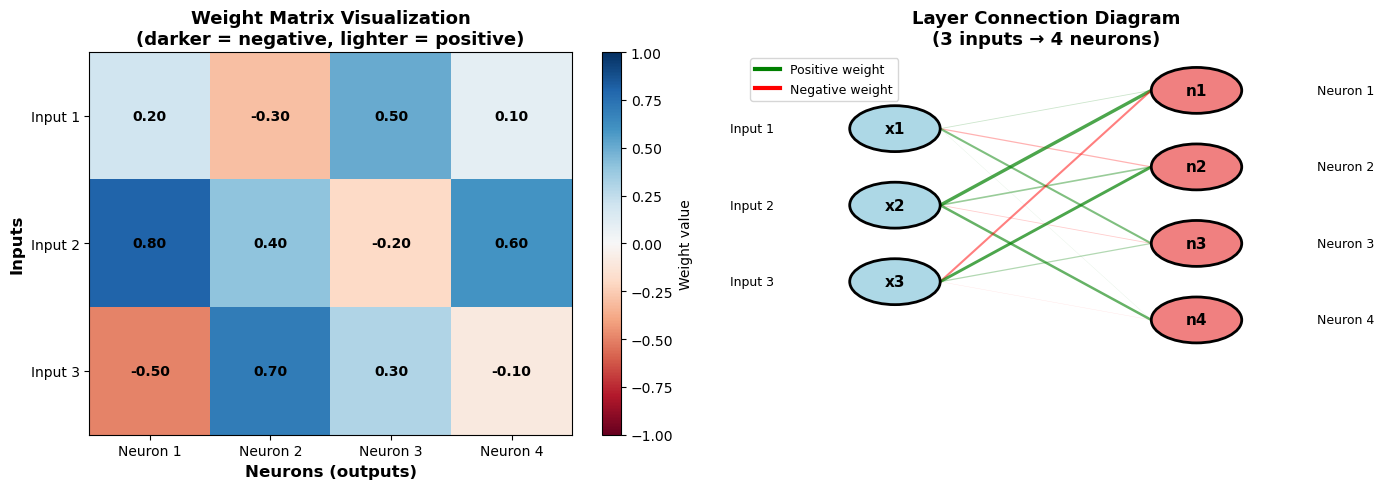


💡 Key Observations:
   • Each INPUT connects to ALL NEURONS (fully connected)
   • Green lines = positive weights (excitatory)
   • Red lines = negative weights (inhibitory)
   • Thicker lines = larger weight magnitudes (stronger connections)
   • Total connections: 3 inputs × 4 neurons = 12 weights


In [27]:
# Visualize the weight matrix structure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Show the weight matrix as a heatmap
im = axes[0].imshow(layer_weights, cmap='RdBu', aspect='auto', vmin=-1, vmax=1)
axes[0].set_xlabel('Neurons (outputs)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Inputs', fontsize=12, fontweight='bold')
axes[0].set_title('Weight Matrix Visualization\n(darker = negative, lighter = positive)', fontsize=13, fontweight='bold')
axes[0].set_xticks(range(4))
axes[0].set_xticklabels(['Neuron 1', 'Neuron 2', 'Neuron 3', 'Neuron 4'])
axes[0].set_yticks(range(3))
axes[0].set_yticklabels(['Input 1', 'Input 2', 'Input 3'])

# Add weight values as text
for i in range(3):
    for j in range(4):
        text = axes[0].text(j, i, f'{layer_weights[i, j]:.2f}',
                           ha="center", va="center", color="black", fontsize=10, fontweight='bold')

plt.colorbar(im, ax=axes[0], label='Weight value')

# Right plot: Show the connections as a network diagram
axes[1].set_xlim(-0.5, 3.5)
axes[1].set_ylim(-0.5, 4.5)
axes[1].axis('off')
axes[1].set_title('Layer Connection Diagram\n(3 inputs → 4 neurons)', fontsize=13, fontweight='bold')

# Draw input nodes (left side)
input_positions = [3.5, 2.5, 1.5]  # y-positions for 3 inputs
for i, y in enumerate(input_positions):
    circle = plt.Circle((0.5, y), 0.3, color='lightblue', ec='black', linewidth=2, zorder=5)
    axes[1].add_patch(circle)
    axes[1].text(0.5, y, f'x{i+1}', ha='center', va='center', fontsize=11, fontweight='bold', zorder=6)
    axes[1].text(-0.3, y, f'Input {i+1}', ha='right', va='center', fontsize=9)

# Draw output nodes (right side)
output_positions = [4, 3, 2, 1]  # y-positions for 4 neurons
for i, y in enumerate(output_positions):
    circle = plt.Circle((2.5, y), 0.3, color='lightcoral', ec='black', linewidth=2, zorder=5)
    axes[1].add_patch(circle)
    axes[1].text(2.5, y, f'n{i+1}', ha='center', va='center', fontsize=11, fontweight='bold', zorder=6)
    axes[1].text(3.3, y, f'Neuron {i+1}', ha='left', va='center', fontsize=9)

# Draw connections (lines from each input to each neuron)
for i, input_y in enumerate(input_positions):
    for j, output_y in enumerate(output_positions):
        # Line thickness based on weight magnitude
        weight = layer_weights[i, j]
        linewidth = abs(weight) * 3  # Thicker lines for larger weights
        color = 'red' if weight < 0 else 'green'
        alpha = min(abs(weight), 0.7)  # Transparency based on weight
        axes[1].plot([0.8, 2.2], [input_y, output_y], color=color, linewidth=linewidth, alpha=alpha, zorder=1)

# Add legend
axes[1].plot([], [], color='green', linewidth=3, label='Positive weight')
axes[1].plot([], [], color='red', linewidth=3, label='Negative weight')
axes[1].legend(loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig('layer_structure.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 Key Observations:")
print("   • Each INPUT connects to ALL NEURONS (fully connected)")
print("   • Green lines = positive weights (excitatory)")
print("   • Red lines = negative weights (inhibitory)")
print("   • Thicker lines = larger weight magnitudes (stronger connections)")
print(f"   • Total connections: 3 inputs × 4 neurons = {3*4} weights")

## Part 4: Hidden Layers - The Secret Feature Detectors 🕵️

### 🔍 What Are Hidden Layers?

In a neural network:
- **Input layer**: The raw data (what we feed in)
- **Hidden layer(s)**: Intermediate processing (the "black box" where magic happens)
- **Output layer**: The final answer (predictions)

### 🎨 The Feature Detector Analogy

Think of hidden layers like Instagram filters:
- **Layer 1**: Detects basic features (edges, colors, textures)
- **Layer 2**: Combines basic features into patterns (shapes, faces)
- **Layer 3**: Combines patterns into complex concepts (objects, scenes)

Each layer learns to detect increasingly **abstract features**!

### 💡 What Does "Feature Detection" Actually Mean?

Let's break this down with a **concrete example** before we look at visualizations:

**Imagine you're trying to classify images of cats vs dogs.** Your input might be pixel values, but the hidden layer transforms these into more useful features:

- **Input**: Raw pixel brightness values [0.2, 0.8, 0.5, ...]
- **Hidden Layer Neuron 1**: Detects "pointy ears" → outputs 0.9 (high activation!)
- **Hidden Layer Neuron 2**: Detects "round face" → outputs 0.1 (low activation)
- **Hidden Layer Neuron 3**: Detects "whiskers" → outputs 0.7 (medium activation)

**The key insight:** The layer TRANSFORMS the raw pixel data into meaningful features that are easier to use for making the final cat/dog decision!

### 📝 Let's See This With Actual Numbers

Before we visualize, let's walk through a simple concrete example step-by-step:

In [28]:
# STEP-BY-STEP EXAMPLE: What does a hidden layer actually DO?
print("🎯 CONCRETE EXAMPLE: Hidden Layer as Feature Detector")
print("="*70)

# Let's start with simple 2D input (2 features)
simple_input = np.array([3.0, 2.0])  # Example: brightness=3.0, size=2.0
print("\n📥 INPUT DATA (2 features):")
print(f"   Feature 1 (brightness): {simple_input[0]}")
print(f"   Feature 2 (size): {simple_input[1]}")
print("   Think of these as measurements from an image")

# Create a simple hidden layer with 3 neurons
# Each neuron will detect a different pattern!
hidden_weights = np.array([
    [0.5, -0.3, 0.2],   # Weights for feature 1 (brightness)
    [0.3,  0.6, 0.4]    # Weights for feature 2 (size)
])

hidden_biases = np.array([0.1, -0.2, 0.0])

print("\n⚙️ HIDDEN LAYER (3 neurons):")
print(f"   Weights shape: {hidden_weights.shape}")
print(f"   Biases: {hidden_biases}")

# Compute hidden layer output
hidden_output = layer_with_matrix(simple_input, hidden_weights, hidden_biases)

print("\n" + "="*70)
print("🔍 WHAT EACH NEURON DETECTED:")
print("="*70)

# Explain what each neuron computed
for neuron_idx in range(3):
    w = hidden_weights[:, neuron_idx]
    b = hidden_biases[neuron_idx]
    
    # Manual calculation for clarity
    weighted_sum = simple_input[0] * w[0] + simple_input[1] * w[1]
    with_bias = weighted_sum + b
    activated = max(0, with_bias)  # ReLU
    
    print(f"\nNeuron {neuron_idx + 1}:")
    print(f"  Weights: [{w[0]}, {w[1]}]")
    print(f"  Calculation: ({simple_input[0]} × {w[0]}) + ({simple_input[1]} × {w[1]}) + {b}")
    print(f"  Weighted sum: {weighted_sum:.2f}")
    print(f"  After bias: {with_bias:.2f}")
    print(f"  After ReLU: {activated:.2f}")
    
    # Interpret what this neuron might be detecting
    if neuron_idx == 0:
        print(f"  💡 This neuron likes BRIGHT things (positive weight on brightness)")
    elif neuron_idx == 1:
        print(f"  💡 This neuron likes LARGE things (positive weight on size)")
    else:
        print(f"  💡 This neuron responds to BOTH features")

print("\n" + "="*70)
print("📤 HIDDEN LAYER OUTPUT:")
print(f"   {hidden_output}")
print("\n💭 KEY INSIGHT:")
print("   • We started with 2 raw measurements (brightness, size)")
print("   • The hidden layer transformed them into 3 NEW features")
print("   • Each new feature represents a different PATTERN the layer detected")
print("   • These new features are often more useful than raw inputs!")
print("\n   This is why hidden layers are called 'FEATURE DETECTORS'! 🎯")


🎯 CONCRETE EXAMPLE: Hidden Layer as Feature Detector

📥 INPUT DATA (2 features):
   Feature 1 (brightness): 3.0
   Feature 2 (size): 2.0
   Think of these as measurements from an image

⚙️ HIDDEN LAYER (3 neurons):
   Weights shape: (2, 3)
   Biases: [ 0.1 -0.2  0. ]

🔍 WHAT EACH NEURON DETECTED:

Neuron 1:
  Weights: [0.5, 0.3]
  Calculation: (3.0 × 0.5) + (2.0 × 0.3) + 0.1
  Weighted sum: 2.10
  After bias: 2.20
  After ReLU: 2.20
  💡 This neuron likes BRIGHT things (positive weight on brightness)

Neuron 2:
  Weights: [-0.3, 0.6]
  Calculation: (3.0 × -0.3) + (2.0 × 0.6) + -0.2
  Weighted sum: 0.30
  After bias: 0.10
  After ReLU: 0.10
  💡 This neuron likes LARGE things (positive weight on size)

Neuron 3:
  Weights: [0.2, 0.4]
  Calculation: (3.0 × 0.2) + (2.0 × 0.4) + 0.0
  Weighted sum: 1.40
  After bias: 1.40
  After ReLU: 1.40
  💡 This neuron responds to BOTH features

📤 HIDDEN LAYER OUTPUT:
   [2.2 0.1 1.4]

💭 KEY INSIGHT:
   • We started with 2 raw measurements (brightness, s

### 📊 Visualization: How Hidden Layers Transform Data

Now let's visualize this transformation process with many data points.

**What you'll see in the graphs below:**

1. **Left Plot (Blue)**: Original 2D input data
   - 100 data points with 2 features each
   - Think of this as your raw measurements

2. **Middle Plot (Red)**: Transformed data (2 neurons shown)
   - The same 100 points after passing through the layer
   - Shows outputs from neurons 1 and 2
   - Notice how the pattern changed!

3. **Right Plot (Green, 3D)**: Full transformation (all 3 neurons)
   - Shows all 3 neuron outputs simultaneously
   - The layer expanded 2D data into 3D space
   - Each axis represents one neuron's detected feature

**The Magic:** The hidden layer reshapes and transforms the data into a new representation where patterns might be easier to detect!

📊 Data Transformation:
   Input shape: (100, 2) (100 samples, 2 features each)
   Output shape: (100, 3) (100 samples, 3 features each)

   ✨ The layer transformed 2D data into 3D data!


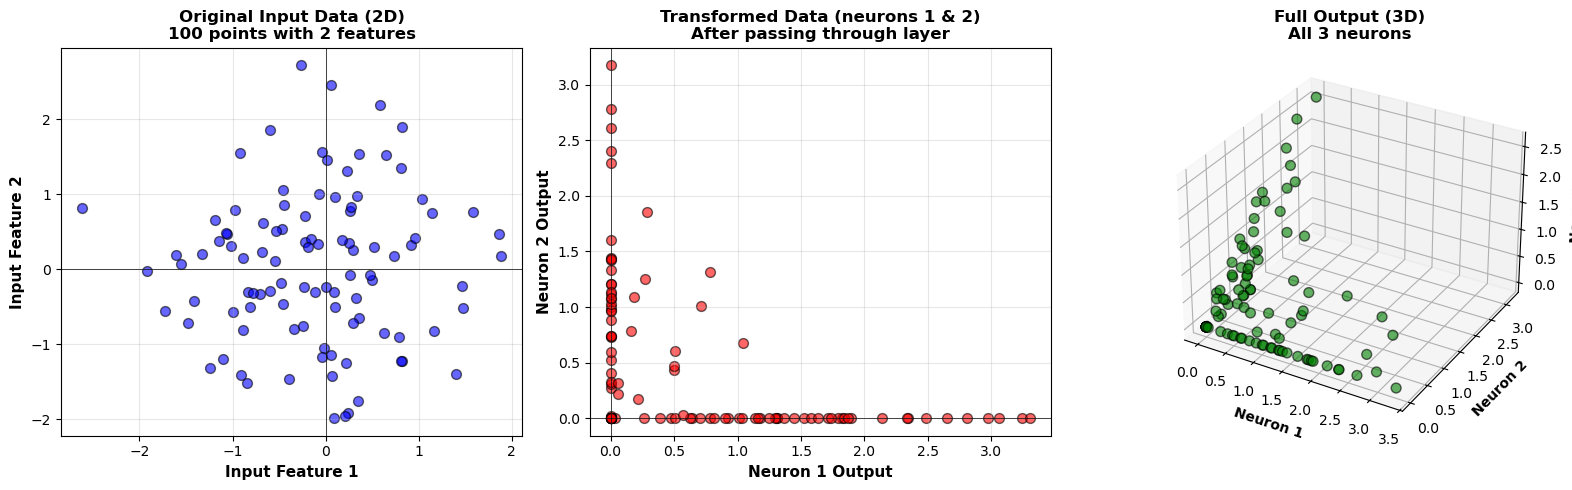


💡 WHAT JUST HAPPENED? Let's Break It Down:

1️⃣ FEATURE EXTRACTION:
   • The layer acted as a FEATURE EXTRACTOR
   • Each of the 3 neurons learned to detect a different pattern

2️⃣ DIMENSIONALITY CHANGE:
   • Input: 2 features (2D space)
   • Output: 3 features (3D space)
   • The layer EXPANDED the representation!

3️⃣ NON-LINEAR TRANSFORMATION:
   • The weights multiplied and recombined the features
   • ReLU added non-linearity (made some values 0)
   • The data is now in a DIFFERENT geometric arrangement

4️⃣ WHY THIS MATTERS:
   • Patterns that were hard to see in 2D might be obvious in 3D
   • The next layer can work with these NEW features
   • This is how neural networks learn hierarchical features!


🎯 REMEMBER: Hidden layers are FEATURE TRANSFORMERS!
   They turn raw inputs into representations that are
   easier for the network to make decisions with!
   • The network can now see the data in 3D instead of 2D!


In [30]:
# Create a simple example showing how a layer transforms data
# We'll use 2D inputs so we can visualize them

# Generate some random 2D data points
num_points = 100  # Number of data points
input_data = np.random.randn(num_points, 2)  # 100 points with 2 features each

# Create a layer with 2 inputs and 3 neurons
layer_weights_2d = np.array([
    [1.5, -0.8, 0.3],   # Weights from input 1 to each neuron
    [-0.5, 1.2, 0.9]    # Weights from input 2 to each neuron
])

layer_biases_2d = np.array([0.5, -0.3, 0.2])  # Biases for 3 neurons

# Transform all data points through the layer
def transform_batch(inputs, weights, biases):
    """
    Transform multiple data points through a layer.
    
    Parameters:
    - inputs: shape (num_samples, num_inputs)
    - weights: shape (num_inputs, num_neurons)
    - biases: shape (num_neurons,)
    
    Returns:
    - outputs: shape (num_samples, num_neurons)
    """
    # Matrix multiplication handles all samples at once!
    z = np.dot(inputs, weights) + biases  # Compute for ALL samples simultaneously
    outputs = relu(z)  # Apply activation to all outputs
    return outputs

# Transform the data
output_data = transform_batch(input_data, layer_weights_2d, layer_biases_2d)

print("📊 Data Transformation:")
print(f"   Input shape: {input_data.shape} (100 samples, 2 features each)")
print(f"   Output shape: {output_data.shape} (100 samples, 3 features each)")
print("\n   ✨ The layer transformed 2D data into 3D data!")

# Visualize the transformation
fig = plt.figure(figsize=(16, 5))

# Plot 1: Original input data (2D)
ax1 = fig.add_subplot(131)
ax1.scatter(input_data[:, 0], input_data[:, 1], alpha=0.6, s=50, c='blue', edgecolors='black')
ax1.set_xlabel('Input Feature 1', fontsize=11, fontweight='bold')
ax1.set_ylabel('Input Feature 2', fontsize=11, fontweight='bold')
ax1.set_title('Original Input Data (2D)\n100 points with 2 features', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

# Plot 2: Output data projected to 2D (neurons 1 and 2)
ax2 = fig.add_subplot(132)
ax2.scatter(output_data[:, 0], output_data[:, 1], alpha=0.6, s=50, c='red', edgecolors='black')
ax2.set_xlabel('Neuron 1 Output', fontsize=11, fontweight='bold')
ax2.set_ylabel('Neuron 2 Output', fontsize=11, fontweight='bold')
ax2.set_title('Transformed Data (neurons 1 & 2)\nAfter passing through layer', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)

# Plot 3: 3D visualization of all outputs
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(output_data[:, 0], output_data[:, 1], output_data[:, 2], 
           alpha=0.6, s=50, c='green', edgecolors='black')
ax3.set_xlabel('Neuron 1', fontsize=10, fontweight='bold')
ax3.set_ylabel('Neuron 2', fontsize=10, fontweight='bold')
ax3.set_zlabel('Neuron 3', fontsize=10, fontweight='bold')
ax3.set_title('Full Output (3D)\nAll 3 neurons', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('layer_transformation.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 WHAT JUST HAPPENED? Let's Break It Down:")
print("="*70)
print("\n1️⃣ FEATURE EXTRACTION:")
print("   • The layer acted as a FEATURE EXTRACTOR")
print("   • Each of the 3 neurons learned to detect a different pattern")
print("\n2️⃣ DIMENSIONALITY CHANGE:")
print("   • Input: 2 features (2D space)")
print("   • Output: 3 features (3D space)")
print("   • The layer EXPANDED the representation!")
print("\n3️⃣ NON-LINEAR TRANSFORMATION:")
print("   • The weights multiplied and recombined the features")
print("   • ReLU added non-linearity (made some values 0)")
print("   • The data is now in a DIFFERENT geometric arrangement")
print("\n4️⃣ WHY THIS MATTERS:")
print("   • Patterns that were hard to see in 2D might be obvious in 3D")
print("   • The next layer can work with these NEW features")
print("   • This is how neural networks learn hierarchical features!")
print("\n" + "="*70)
print("\n🎯 REMEMBER: Hidden layers are FEATURE TRANSFORMERS!")
print("   They turn raw inputs into representations that are")
print("   easier for the network to make decisions with!")
print("   • The network can now see the data in 3D instead of 2D!")

## Part 5: Interactive Experimentation 🧪

### Let's Build Layers Step by Step!

Now that we understand how layers work, let's experiment with building different-sized layers. We'll start with a simple concrete example, then explore how layer size affects what the network can learn.

**What we'll discover:**
- 🔢 How layer size changes the number of parameters
- 🎯 How neurons transform input data
- 📊 Visual comparison of different layer configurations


In [ ]:
# STEP 1: Start with a Concrete Example
# Let's build a simple layer with specific numbers we can follow

print("🎯 STEP-BY-STEP EXAMPLE: Building a 3→4 Layer")
print("="*70)
print("We'll create a layer that takes 3 inputs and has 4 neurons.\n")

# Create simple input data (easy to follow)
simple_input = np.array([1.0, 2.0, 3.0])  # 3 inputs
print("📥 Our input data: [1.0, 2.0, 3.0]")
print("   (Think of these as 3 features, like: brightness, size, color)\n")

# Create simple weights (not random - easier to understand)
simple_weights = np.array([
    [0.5, -0.3, 0.2, 0.4],   # Weights from input 1 to all 4 neurons
    [0.3,  0.6, -0.1, 0.2],  # Weights from input 2 to all 4 neurons  
    [-0.2, 0.4, 0.5, -0.3]   # Weights from input 3 to all 4 neurons
])
print("⚖️  Weights shape:", simple_weights.shape)
print("   • 3 rows (one for each input)")
print("   • 4 columns (one for each neuron)")
print("   • Total: 3 × 4 = 12 weights\n")

# Create simple biases
simple_biases = np.array([0.1, -0.2, 0.0, 0.15])  # One per neuron
print("➕ Biases:", simple_biases)
print("   (One bias for each of the 4 neurons)\n")

print("="*70)
print("🔄 Computing the layer output...\n")

# Compute the output
simple_output = layer_with_matrix(simple_input, simple_weights, simple_biases)

print("📤 Layer output:", simple_output)
print("\n💡 What happened?")
print("   • We started with 3 numbers (inputs)")
print("   • The layer transformed them into 4 numbers (outputs)")
print("   • Each neuron detected a different pattern!")
print("\n   Active neurons:", np.sum(simple_output > 0), "out of 4")
print("   (Inactive neurons output 0 because ReLU cut off negative values)")



🔬 EXPERIMENT 1: Small Layer
🏗️  BUILDING A LAYER: 2 inputs → 3 neurons

📥 Input: [-0.42098448  0.28977486]
⚖️  Weights shape: (2, 3)
➕ Biases: [-0.10080863 -0.18707919 -0.03515135]

📤 Output: [0. 0. 0.]

📊 Statistics:
   • Total parameters: 9 (6 weights + 3 biases)
   • Active neurons (output > 0): 0 out of 3
   • Output mean: 0.0000
   • Output std: 0.0000


🔬 EXPERIMENT 2: Larger Layer
🏗️  BUILDING A LAYER: 5 inputs → 10 neurons

📥 Input: [ 0.01841838  1.67643731  0.32692737 -0.21910053  0.82940558]
⚖️  Weights shape: (5, 10)
➕ Biases: [-0.05112157 -0.09896048 -0.01257869  0.00557249  0.10941915 -0.16924646
  0.15295503 -0.01580079 -0.04268811 -0.10121044]

📤 Output: [0.         0.         0.         1.00966821 0.         0.
 0.         1.28347561 1.16074957 1.2304975 ]

📊 Statistics:
   • Total parameters: 60 (50 weights + 10 biases)
   • Active neurons (output > 0): 4 out of 10
   • Output mean: 0.4684
   • Output std: 0.5774


🔬 EXPERIMENT 3: Wide Layer
🏗️  BUILDING A LAYER: 3 in

### 🔍 Understanding What We Just Built

Let's break down the numbers:

**Total Parameters in Our Layer:**
- **Weights**: 3 inputs × 4 neurons = 12 weights
- **Biases**: 4 neurons = 4 biases
- **Total**: 12 + 4 = **16 parameters**

**Why Some Neurons Are Inactive:**
- Before ReLU, a neuron might compute a negative value
- ReLU turns negative values into 0
- This is normal! Not all neurons activate for all inputs
- Different inputs will activate different neurons

Now let's explore how changing layer size affects the network! 🚀


In [31]:
# STEP 2: Now let's experiment with different layer sizes!
# We'll create a simple function to test various configurations

def test_layer_size(num_inputs, num_neurons, example_name):
    """
    Build and test a layer with the given size.
    
    Parameters:
    - num_inputs: How many input values
    - num_neurons: How many neurons in the layer
    - example_name: A friendly name for this test
    """
    print(f"\n{'='*70}")
    print(f"🧪 {example_name}")
    print(f"   Configuration: {num_inputs} inputs → {num_neurons} neurons")
    print("="*70)
    
    # Calculate parameters BEFORE creating anything
    num_weights = num_inputs * num_neurons
    num_biases = num_neurons
    total_params = num_weights + num_biases
    
    print(f"\n📊 Layer Statistics:")
    print(f"   • Weights: {num_inputs} × {num_neurons} = {num_weights}")
    print(f"   • Biases: {num_biases}")
    print(f"   • Total Parameters: {total_params}")
    
    # Create random input
    test_input = np.random.randn(num_inputs) * 2  # Random inputs
    
    # Create random weights (small values)
    weights = np.random.randn(num_inputs, num_neurons) * 0.5
    
    # Create random biases (small values)
    biases = np.random.randn(num_neurons) * 0.1
    
    # Compute layer output
    output = layer_with_matrix(test_input, weights, biases)
    
    # Show results
    print(f"\n🔄 Processing:")
    print(f"   Input (first 5 values): {test_input[:5]}..." if len(test_input) > 5 else f"   Input: {test_input}")
    print(f"   Output (first 5 values): {output[:5]}..." if len(output) > 5 else f"   Output: {output}")
    
    # Calculate useful statistics
    active_neurons = np.sum(output > 0)
    inactive_neurons = num_neurons - active_neurons
    activation_rate = (active_neurons / num_neurons) * 100
    
    print(f"\n✅ Results:")
    print(f"   • Active neurons: {active_neurons}/{num_neurons} ({activation_rate:.1f}%)")
    print(f"   • Inactive neurons: {inactive_neurons}/{num_neurons}")
    print(f"   • Output range: [{output.min():.2f}, {output.max():.2f}]")
    
    return {
        'num_inputs': num_inputs,
        'num_neurons': num_neurons,
        'total_params': total_params,
        'active_neurons': active_neurons,
        'activation_rate': activation_rate,
        'output': output
    }

# Store results for comparison
results = []

print("\n" + "#"*70)
print("#" + " "*20 + "LAYER SIZE EXPERIMENTS" + " "*21 + "#")
print("#"*70)



######################################################################
#                    LAYER SIZE EXPERIMENTS                     #
######################################################################


In [32]:
# Experiment 1: Tiny layer (easy to understand)
result1 = test_layer_size(
    num_inputs=2, 
    num_neurons=3,
    example_name="EXPERIMENT 1: Tiny Layer (2→3)"
)
results.append(result1)

# Experiment 2: Medium layer (more realistic)
result2 = test_layer_size(
    num_inputs=5, 
    num_neurons=8,
    example_name="EXPERIMENT 2: Medium Layer (5→8)"
)
results.append(result2)

# Experiment 3: Wide layer (many neurons)
result3 = test_layer_size(
    num_inputs=4, 
    num_neurons=16,
    example_name="EXPERIMENT 3: Wide Layer (4→16)"
)
results.append(result3)

# Experiment 4: Narrow but deep input (many features)
result4 = test_layer_size(
    num_inputs=10, 
    num_neurons=5,
    example_name="EXPERIMENT 4: Many Inputs (10→5)"
)
results.append(result4)



🧪 EXPERIMENT 1: Tiny Layer (2→3)
   Configuration: 2 inputs → 3 neurons

📊 Layer Statistics:
   • Weights: 2 × 3 = 6
   • Biases: 3
   • Total Parameters: 9

🔄 Processing:
   Input: [0.71557472 1.12156905]
   Output: [0.         1.05113401 0.        ]

✅ Results:
   • Active neurons: 1/3 (33.3%)
   • Inactive neurons: 2/3
   • Output range: [0.00, 1.05]

🧪 EXPERIMENT 2: Medium Layer (5→8)
   Configuration: 5 inputs → 8 neurons

📊 Layer Statistics:
   • Weights: 5 × 8 = 40
   • Biases: 8
   • Total Parameters: 48

🔄 Processing:
   Input: [ 2.27113128  1.90800353  1.3027825  -0.63053849  1.51793844]
   Output (first 5 values): [0.41834146 0.61826553 0.         0.         2.5232603 ]...

✅ Results:
   • Active neurons: 3/8 (37.5%)
   • Inactive neurons: 5/8
   • Output range: [0.00, 2.52]

🧪 EXPERIMENT 3: Wide Layer (4→16)
   Configuration: 4 inputs → 16 neurons

📊 Layer Statistics:
   • Weights: 4 × 16 = 64
   • Biases: 16
   • Total Parameters: 80

🔄 Processing:
   Input: [-0.5051363  


📊 COMPARING ALL EXPERIMENTS


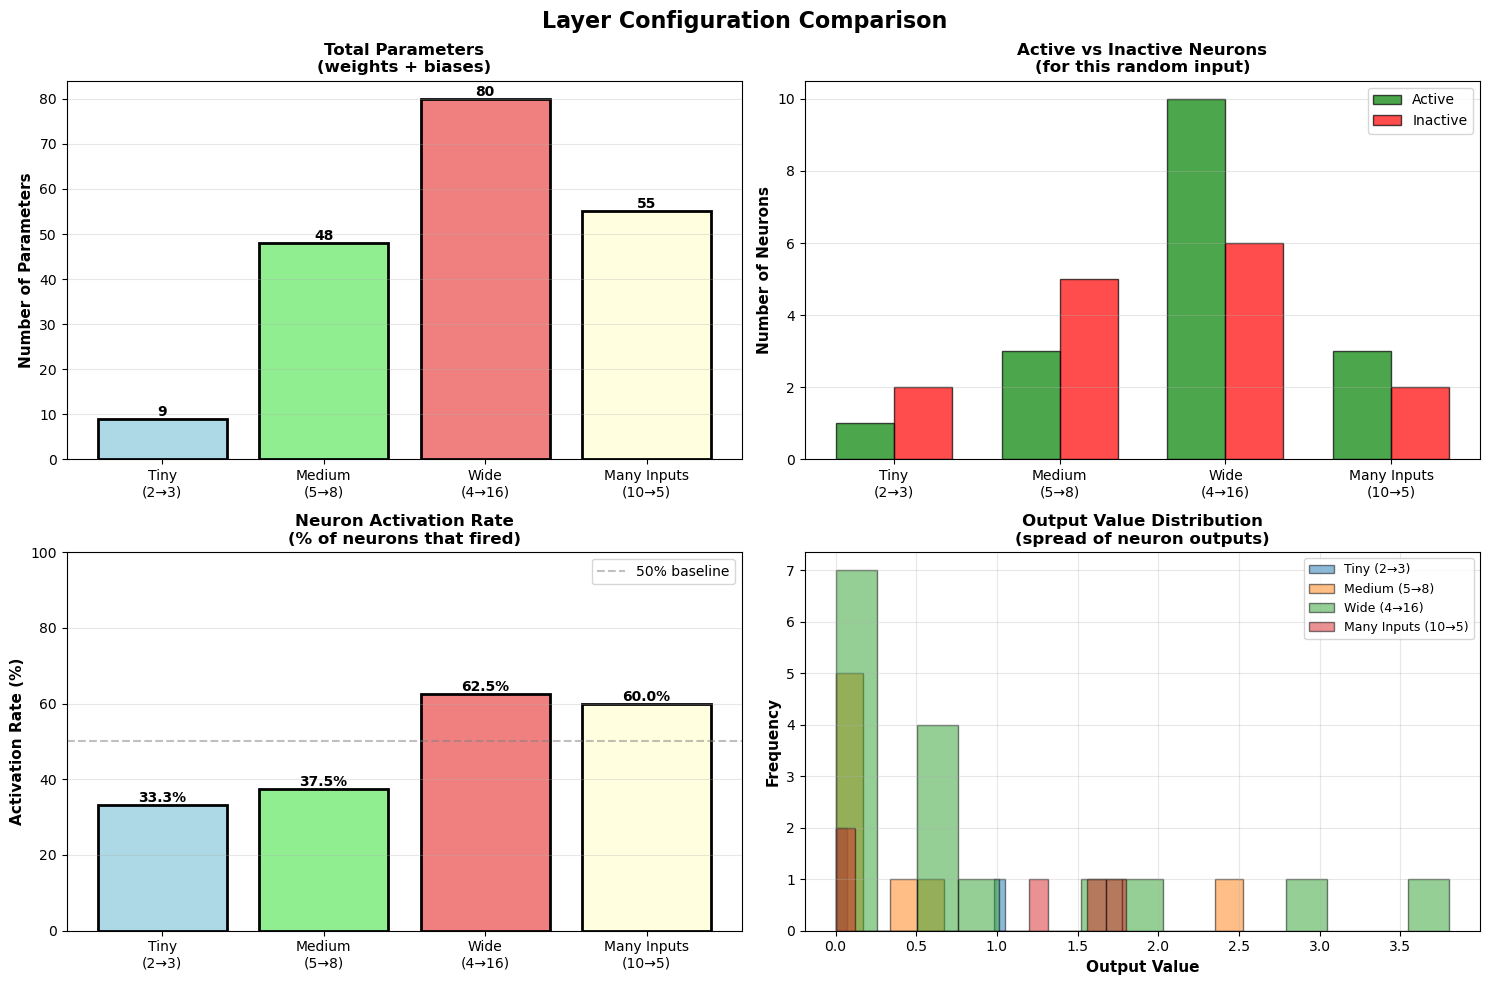


📋 COMPARISON TABLE
Experiment           Config       Params     Active       Rate      
Tiny (2→3)           2→3          9          1/3          33.3%     
Medium (5→8)         5→8          48         3/8          37.5%     
Wide (4→16)          4→16         80         10/16        62.5%     
Many Inputs (10→5)   10→5         55         3/5          60.0%     


In [33]:
# STEP 3: Visualize and Compare Results
import matplotlib.pyplot as plt

print("\n" + "="*70)
print("📊 COMPARING ALL EXPERIMENTS")
print("="*70)

# Create comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Layer Configuration Comparison', fontsize=16, fontweight='bold')

# Extract data for plotting
experiment_names = ["Tiny\n(2→3)", "Medium\n(5→8)", "Wide\n(4→16)", "Many Inputs\n(10→5)"]
param_counts = [r['total_params'] for r in results]
neuron_counts = [r['num_neurons'] for r in results]
active_counts = [r['active_neurons'] for r in results]
activation_rates = [r['activation_rate'] for r in results]

# Plot 1: Total Parameters
ax1 = axes[0, 0]
bars1 = ax1.bar(experiment_names, param_counts, color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'], edgecolor='black', linewidth=2)
ax1.set_ylabel('Number of Parameters', fontsize=11, fontweight='bold')
ax1.set_title('Total Parameters\n(weights + biases)', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
# Add value labels on bars
for bar, value in zip(bars1, param_counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(value)}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Active vs Inactive Neurons
ax2 = axes[0, 1]
x_pos = range(len(experiment_names))
width = 0.35
inactive_counts = [r['num_neurons'] - r['active_neurons'] for r in results]

bars2a = ax2.bar([p - width/2 for p in x_pos], active_counts, width, label='Active', color='green', alpha=0.7, edgecolor='black')
bars2b = ax2.bar([p + width/2 for p in x_pos], inactive_counts, width, label='Inactive', color='red', alpha=0.7, edgecolor='black')
ax2.set_ylabel('Number of Neurons', fontsize=11, fontweight='bold')
ax2.set_title('Active vs Inactive Neurons\n(for this random input)', fontsize=12, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(experiment_names)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Activation Rate
ax3 = axes[1, 0]
bars3 = ax3.bar(experiment_names, activation_rates, color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'], edgecolor='black', linewidth=2)
ax3.set_ylabel('Activation Rate (%)', fontsize=11, fontweight='bold')
ax3.set_title('Neuron Activation Rate\n(% of neurons that fired)', fontsize=12, fontweight='bold')
ax3.set_ylim([0, 100])
ax3.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='50% baseline')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)
# Add value labels
for bar, value in zip(bars3, activation_rates):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# Plot 4: Output Distribution for each experiment
ax4 = axes[1, 1]
for idx, (result, name) in enumerate(zip(results, experiment_names)):
    output = result['output']
    # Create a histogram for this experiment
    ax4.hist(output, bins=15, alpha=0.5, label=name.replace('\n', ' '), edgecolor='black')

ax4.set_xlabel('Output Value', fontsize=11, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax4.set_title('Output Value Distribution\n(spread of neuron outputs)', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print comparison table
print("\n📋 COMPARISON TABLE")
print("="*90)
print(f"{'Experiment':<20} {'Config':<12} {'Params':<10} {'Active':<12} {'Rate':<10}")
print("="*90)
for name, result in zip(experiment_names, results):
    config = f"{result['num_inputs']}→{result['num_neurons']}"
    active_str = f"{result['active_neurons']}/{result['num_neurons']}"
    rate_str = f"{result['activation_rate']:.1f}%"
    print(f"{name.replace(chr(10), ' '):<20} {config:<12} {result['total_params']:<10} {active_str:<12} {rate_str:<10}")
print("="*90)


### 💡 Key Observations from Our Experiments

**What We Learned:**

1. **Parameters Grow Quickly** 📈
   - More inputs OR more neurons = more parameters
   - Formula: `Parameters = (inputs × neurons) + neurons`
   - Example: A 10→5 layer has (10×5) + 5 = **55 parameters**

2. **Not All Neurons Fire** 🔥
   - ReLU makes some neurons inactive (output = 0)
   - This is healthy! It creates **sparse activations**
   - Different inputs will activate different neurons
   - Typical activation rate: 40-60%

3. **More Neurons = More Feature Detectors** 🎯
   - Wide layers (many neurons) can detect more patterns
   - But they also need more parameters (more to learn)
   - Balance is key: not too small, not too large

4. **Layer Design Trade-offs** ⚖️
   - **Wide layers** (many neurons): More features, more parameters
   - **Narrow layers** (few neurons): Fewer features, fewer parameters
   - **Many inputs**: More detailed information, more parameters

### 🎮 Try It Yourself!

Modify the experiments above to test:
- A really tiny layer: 2→2
- A really wide layer: 3→50
- Your own custom configuration!

**Hint:** Call `test_layer_size(your_inputs, your_neurons, "My Custom Test")` in a new cell below!


## Part 6: Common Mistakes ⚠️

Let's learn from common errors so you can avoid them!

In [34]:
# Common Mistake #1: Dimension Mismatch
print("⚠️  COMMON MISTAKE #1: Wrong Weight Dimensions\n")

# Correct way
correct_inputs = np.array([1.0, 2.0, 3.0])  # 3 inputs
correct_weights = np.array([[0.5, 0.2],     # 3 rows (one per input)
                           [0.3, 0.4],
                           [0.1, 0.6]])     # 2 columns (one per neuron)
correct_biases = np.array([0.1, 0.2])       # 2 biases (one per neuron)

print("✅ CORRECT:")
print(f"   Inputs shape: {correct_inputs.shape} (3 inputs)")
print(f"   Weights shape: {correct_weights.shape} (3 inputs × 2 neurons)")
print(f"   Biases shape: {correct_biases.shape} (2 neurons)")
result = layer_with_matrix(correct_inputs, correct_weights, correct_biases)
print(f"   Output: {result} ✓")

print("\n❌ WRONG:")
# Wrong way - transposed weights
wrong_weights = np.array([[0.5, 0.3, 0.1],  # 2 rows (should be 3!)
                         [0.2, 0.4, 0.6]])  # Neurons as rows instead of columns

print(f"   Inputs shape: {correct_inputs.shape} (3 inputs)")
print(f"   Weights shape: {wrong_weights.shape} (2×3 - WRONG!)")

try:
    layer_with_matrix(correct_inputs, wrong_weights, correct_biases)
except ValueError as e:
    print(f"   ERROR: {e}")
    print("   ❗ The shapes don't match for matrix multiplication!")

print("\n💡 Remember: Weights shape must be (num_inputs, num_neurons)")

print("\n" + "="*70)

# Common Mistake #2: Wrong number of biases
print("\n⚠️  COMMON MISTAKE #2: Wrong Number of Biases\n")

print("✅ CORRECT: One bias per neuron")
print(f"   Neurons: 2")
print(f"   Biases: {correct_biases} (length 2) ✓")

print("\n❌ WRONG: Biases don't match neurons")
wrong_biases = np.array([0.1, 0.2, 0.3])  # 3 biases for 2 neurons!
print(f"   Neurons: 2")
print(f"   Biases: {wrong_biases} (length 3 - WRONG!)")

try:
    layer_with_matrix(correct_inputs, correct_weights, wrong_biases)
except ValueError as e:
    print(f"   ERROR: {e}")
    print("   ❗ Number of biases must equal number of neurons!")

print("\n💡 Remember: You need exactly ONE bias per neuron")

print("\n" + "="*70)

# Common Mistake #3: Forgetting activation function
print("\n⚠️  COMMON MISTAKE #3: Forgetting Activation Function\n")

test_inputs = np.array([1.0, -2.0])
test_weights = np.array([[0.5], [-0.5]])
test_bias = np.array([0.0])

# Without activation (LINEAR)
linear_output = np.dot(test_inputs, test_weights) + test_bias
print("❌ WITHOUT activation (linear):")
print(f"   Input: {test_inputs}")
print(f"   Output: {linear_output[0]:.2f}")
print("   Problem: Can be any value (including negative)")

# With activation (NON-LINEAR)
nonlinear_output = relu(linear_output)
print("\n✅ WITH activation (ReLU):")
print(f"   Input: {test_inputs}")
print(f"   Output: {nonlinear_output[0]:.2f}")
print("   Benefit: Non-linearity allows learning complex patterns!")

print("\n💡 Remember: ALWAYS use an activation function!")
print("   Without it, your network is just linear algebra (boring and limited)")

⚠️  COMMON MISTAKE #1: Wrong Weight Dimensions

✅ CORRECT:
   Inputs shape: (3,) (3 inputs)
   Weights shape: (3, 2) (3 inputs × 2 neurons)
   Biases shape: (2,) (2 neurons)
   Output: [1.5 3. ] ✓

❌ WRONG:
   Inputs shape: (3,) (3 inputs)
   Weights shape: (2, 3) (2×3 - WRONG!)
   ERROR: shapes (3,) and (2,3) not aligned: 3 (dim 0) != 2 (dim 0)
   ❗ The shapes don't match for matrix multiplication!

💡 Remember: Weights shape must be (num_inputs, num_neurons)


⚠️  COMMON MISTAKE #2: Wrong Number of Biases

✅ CORRECT: One bias per neuron
   Neurons: 2
   Biases: [0.1 0.2] (length 2) ✓

❌ WRONG: Biases don't match neurons
   Neurons: 2
   Biases: [0.1 0.2 0.3] (length 3 - WRONG!)
   ERROR: operands could not be broadcast together with shapes (2,) (3,) 
   ❗ Number of biases must equal number of neurons!

💡 Remember: You need exactly ONE bias per neuron


⚠️  COMMON MISTAKE #3: Forgetting Activation Function

❌ WITHOUT activation (linear):
   Input: [ 1. -2.]
   Output: 1.50
   Problem: 

## Part 7: Visualizing Layer Architecture 📐

Let's create a comprehensive visualization of how layers connect in a network:

🎨 Visualizing a 3-layer network: [3, 4, 2]


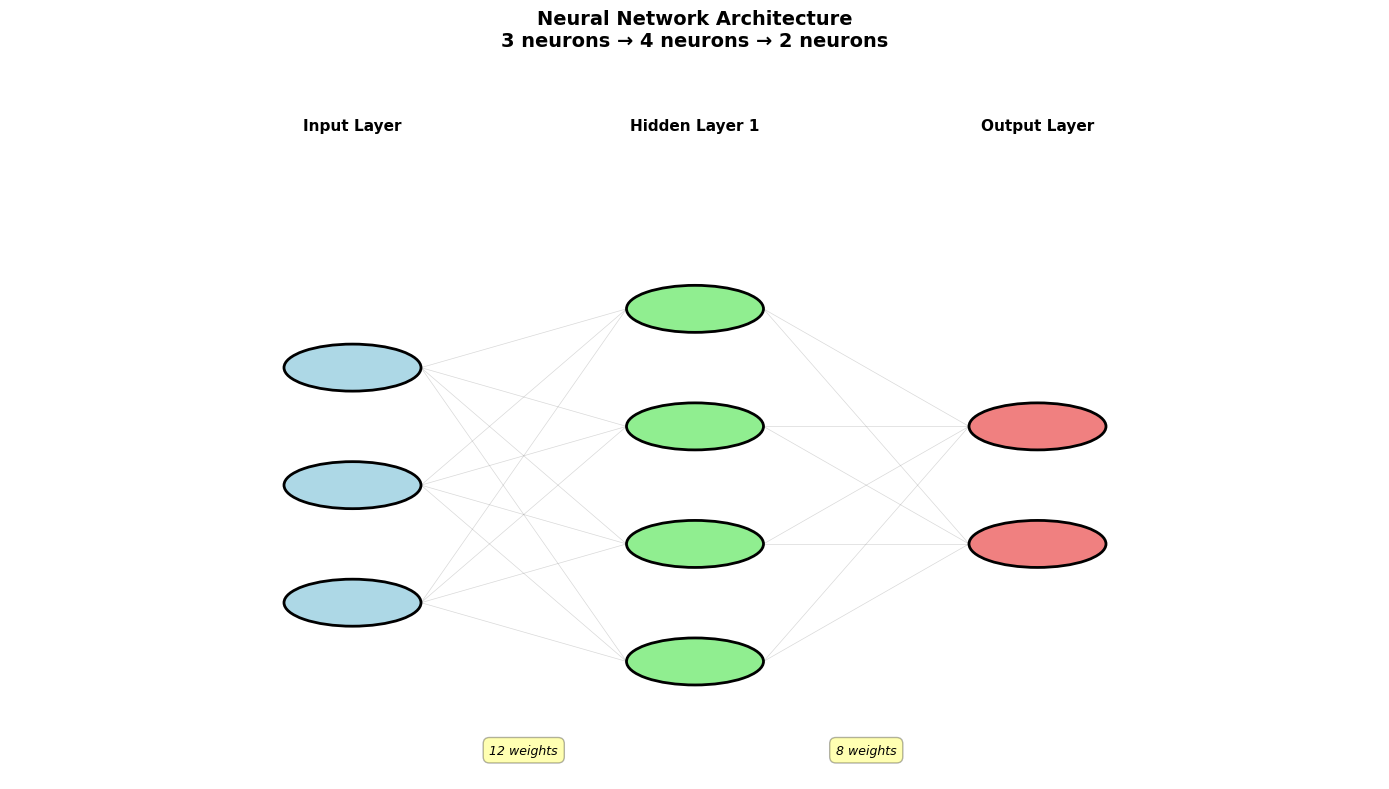


📊 NETWORK STATISTICS:

Layer 0 → Layer 1:
  • Neurons: 3 → 4
  • Weights: 12 (3 × 4)
  • Biases: 4
  • Total parameters: 16

Layer 1 → Layer 2:
  • Neurons: 4 → 2
  • Weights: 8 (4 × 2)
  • Biases: 2
  • Total parameters: 10

🎯 TOTAL PARAMETERS IN NETWORK: 26


🎨 Visualizing a deeper network: [5, 8, 6, 3]


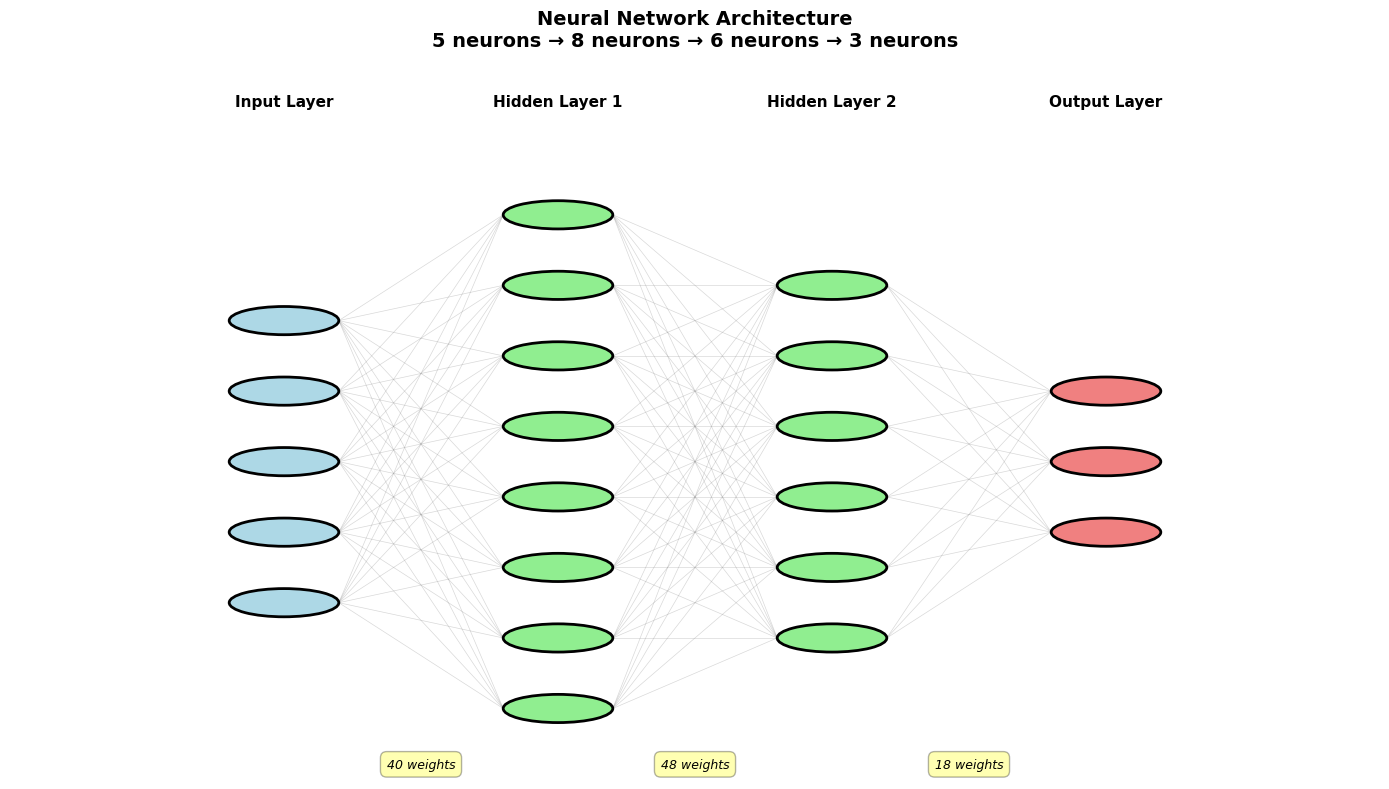


📊 NETWORK STATISTICS:

Layer 0 → Layer 1:
  • Neurons: 5 → 8
  • Weights: 40 (5 × 8)
  • Biases: 8
  • Total parameters: 48

Layer 1 → Layer 2:
  • Neurons: 8 → 6
  • Weights: 48 (8 × 6)
  • Biases: 6
  • Total parameters: 54

Layer 2 → Layer 3:
  • Neurons: 6 → 3
  • Weights: 18 (6 × 3)
  • Biases: 3
  • Total parameters: 21

🎯 TOTAL PARAMETERS IN NETWORK: 123


In [35]:
# Create a visualization of a multi-layer architecture
def visualize_network_architecture(layer_sizes):
    """
    Visualize a neural network architecture.
    
    Parameters:
    - layer_sizes: list of integers representing neurons in each layer
                  e.g., [3, 4, 2] means 3 inputs, 4 hidden neurons, 2 outputs
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.set_xlim(-1, len(layer_sizes))
    ax.set_ylim(-1, max(layer_sizes) + 1)
    ax.axis('off')
    
    # Layer names
    layer_names = ['Input Layer'] + [f'Hidden Layer {i}' for i in range(1, len(layer_sizes)-1)] + ['Output Layer']
    
    ax.set_title('Neural Network Architecture\n' + ' → '.join([f'{size} neurons' for size in layer_sizes]), 
                fontsize=14, fontweight='bold', pad=20)
    
    # Draw each layer
    neuron_positions = []  # Store positions for drawing connections
    
    for layer_idx, num_neurons in enumerate(layer_sizes):
        layer_x = layer_idx  # x-position of this layer
        
        # Calculate y-positions to center the neurons vertically
        start_y = (max(layer_sizes) - num_neurons) / 2
        
        layer_neuron_positions = []
        
        # Draw neurons in this layer
        for neuron_idx in range(num_neurons):
            neuron_y = start_y + neuron_idx
            layer_neuron_positions.append((layer_x, neuron_y))
            
            # Choose color based on layer type
            if layer_idx == 0:
                color = 'lightblue'  # Input layer
            elif layer_idx == len(layer_sizes) - 1:
                color = 'lightcoral'  # Output layer
            else:
                color = 'lightgreen'  # Hidden layers
            
            # Draw neuron circle
            circle = plt.Circle((layer_x, neuron_y), 0.2, color=color, ec='black', linewidth=2, zorder=5)
            ax.add_patch(circle)
        
        neuron_positions.append(layer_neuron_positions)
        
        # Add layer label
        ax.text(layer_x, max(layer_sizes) + 0.5, layer_names[layer_idx], 
               ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Draw connections between layers
    for layer_idx in range(len(layer_sizes) - 1):
        current_layer = neuron_positions[layer_idx]
        next_layer = neuron_positions[layer_idx + 1]
        
        # Connect each neuron in current layer to each neuron in next layer
        for x1, y1 in current_layer:
            for x2, y2 in next_layer:
                ax.plot([x1 + 0.2, x2 - 0.2], [y1, y2], 'gray', linewidth=0.5, alpha=0.3, zorder=1)
    
    # Add connection count annotations
    for layer_idx in range(len(layer_sizes) - 1):
        num_connections = layer_sizes[layer_idx] * layer_sizes[layer_idx + 1]
        mid_x = layer_idx + 0.5
        mid_y = max(layer_sizes) + 0.5
        
        ax.text(mid_x, -0.7, f'{num_connections} weights', 
               ha='center', va='top', fontsize=9, style='italic',
               bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3))
    
    plt.tight_layout()
    plt.savefig('network_architecture.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Print statistics
    total_params = 0
    print("\n📊 NETWORK STATISTICS:")
    print("="*60)
    
    for i in range(len(layer_sizes) - 1):
        num_weights = layer_sizes[i] * layer_sizes[i+1]
        num_biases = layer_sizes[i+1]
        layer_params = num_weights + num_biases
        total_params += layer_params
        
        print(f"\nLayer {i} → Layer {i+1}:")
        print(f"  • Neurons: {layer_sizes[i]} → {layer_sizes[i+1]}")
        print(f"  • Weights: {num_weights} ({layer_sizes[i]} × {layer_sizes[i+1]})")
        print(f"  • Biases: {num_biases}")
        print(f"  • Total parameters: {layer_params}")
    
    print("\n" + "="*60)
    print(f"🎯 TOTAL PARAMETERS IN NETWORK: {total_params}")
    print("="*60)

# Example: Visualize a 3-layer network
print("🎨 Visualizing a 3-layer network: [3, 4, 2]")
visualize_network_architecture([3, 4, 2])

# Example: Visualize a deeper network
print("\n\n🎨 Visualizing a deeper network: [5, 8, 6, 3]")
visualize_network_architecture([5, 8, 6, 3])

## Summary and Key Takeaways 📚

### 🎉 What We Learned Today:

1. **Layers are Teams**: Multiple neurons working in parallel, each detecting different features

2. **Two Ways to Compute**:
   - Loop method: Easy to understand, but slow
   - Matrix multiplication: Fast and efficient!

3. **Weight Matrix Shape**: Always `(num_inputs, num_neurons)`

4. **Hidden Layers**: Act as feature detectors, transforming data into new representations

5. **Important Formula**:
   ```
   Output = Activation(Inputs @ Weights + Biases)
   ```

6. **Common Mistakes**:
   - Wrong weight dimensions
   - Wrong number of biases
   - Forgetting activation functions

### 🔮 What's Next?

In **Notebook 5: Forward Propagation**, we'll learn:
- How to chain multiple layers together
- How data flows through an entire network
- Building a complete neural network from scratch!
- Making predictions with our network

### 💪 Practice Challenge:

Before moving on, try modifying the code above to:
1. Create a layer with 5 inputs and 7 neurons
2. Test it with your own input data
3. Visualize the weight matrix
4. Count the total number of parameters

---

**Remember**: Each layer is like adding a team of specialists to your network. The more layers you have, the more complex patterns your network can learn! 🚀

Ready to move forward? Let's learn how to connect these layers together in the next notebook! 🎯